<a href="https://colab.research.google.com/github/JoshuneArriaga/Apendizaje_Automatico/blob/main/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


In [25]:
df = pd.read_csv("/content/newborn_health_monitoring_with_risk.csv")
df

,baby_id,name,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,date,age_days,weight_kg,...,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score,immunizations_done,reflexes_normal,risk_level
0,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-10,1,3.28,...,98,Formula,11,9,0,4.2,7.0,Yes,Yes,At Risk
1,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-11,2,3.35,...,99,Formula,11,5,2,10.6,NaN,No,No,At Risk
2,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-12,3,3.35,...,97,Breastfeeding,7,6,5,9.8,NaN,No,No,Healthy
3,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-13,4,3.48,...,97,Mixed,11,8,4,8.1,NaN,No,Yes,Healthy
4,B001,Sara,Female,40.2,3.30,50.0,31.9,2024-12-14,5,3.50,...,96,Breastfeeding,11,7,1,11.6,NaN,No,Yes,At Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-03-31,26,5.29,...,96,Formula,8,7,4,4.0,NaN,No,Yes,Healthy
2996,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-01,27,5.23,...,98,Breastfeeding,7,6,1,2.4,NaN,No,Yes,Healthy
2997,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-02,28,5.29,...,98,Breastfeeding,8,4,1,3.6,NaN,No,Yes,Healthy
2998,B100,Brian,Male,39.1,4.47,50.8,36.3,2025-04-03,29,5.39,...,97,Mixed,10,5,2,2.2,NaN,No,No,Healthy


In [26]:
df['apgar_score'] = df.groupby('baby_id')['apgar_score'].ffill()
df['apgar_score'] = df.groupby('baby_id')['apgar_score'].bfill()

In [7]:
numericas = [
    'gestational_age_weeks',
    'birth_weight_kg',
    'birth_length_cm',
    'birth_head_circumference_cm',
    'age_days',
    'weight_kg',
    'length_cm',
    'head_circumference_cm',
    'temperature_c',
    'heart_rate_bpm',
    'respiratory_rate_bpm',
    'oxygen_saturation',
    'feeding_frequency_per_day',
    'urine_output_count',
    'stool_count',
    'jaundice_level_mg_dl',
    'apgar_score'
]
x = df[numericas].copy()
x

,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,heart_rate_bpm,respiratory_rate_bpm,oxygen_saturation,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,apgar_score
0,40.2,3.30,50.0,31.9,1,3.28,50.1,32.0,37.0,160,36,98,11,9,0,4.2,7.0
1,40.2,3.30,50.0,31.9,2,3.35,50.2,32.0,37.2,156,40,99,11,5,2,10.6,7.0
2,40.2,3.30,50.0,31.9,3,3.35,50.6,32.1,37.1,137,37,97,7,6,5,9.8,7.0
3,40.2,3.30,50.0,31.9,4,3.48,50.3,32.0,37.4,130,33,97,11,8,4,8.1,7.0
4,40.2,3.30,50.0,31.9,5,3.50,50.3,31.8,36.8,138,39,96,11,7,1,11.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,39.1,4.47,50.8,36.3,26,5.29,52.4,36.9,36.7,125,44,96,8,7,4,4.0,10.0
2996,39.1,4.47,50.8,36.3,27,5.23,52.1,36.8,37.0,138,31,98,7,6,1,2.4,10.0
2997,39.1,4.47,50.8,36.3,28,5.29,52.3,36.7,36.8,143,42,98,8,4,1,3.6,10.0
2998,39.1,4.47,50.8,36.3,29,5.39,52.4,37.0,37.4,119,52,97,10,5,2,2.2,10.0


In [8]:
#Variable objetivo (predecir peso)
y = x['weight_kg']
X = x.drop(columns=['weight_kg'])

#Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Predicciones
y_pred = modelo.predict(X_test)

In [10]:
#Evaluar desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [11]:
print("MÉTRICA")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MÉTRICA
MAE: 0.0416
MSE: 0.0026
RMSE: 0.0513
R²: 0.9935


Se aplicó un modelo de regresión lineal múltiple para predecir el peso actual del recién nacido a partir de variables  como la edad gestacional, talla, perímetro, signos vitales y frecuencia de alimentación. Los resultados del modelo reflejan que hay una alta precisión por error promedio menor a 0.05 kg y un ajuste casi muy alto, lo que indica que el 99.35 % de la variabilidad del peso del recién nacido es explicada por las variables predictoras incluidas.

In [27]:
df = df.drop(columns=(['baby_id', 'date', 'apgar_score', 'name']))



In [28]:
features_cat = ['gender', 'reflexes_normal', 'feeding_type', 'immunizations_done', 'risk_level']

encoder = LabelEncoder()

for col in features_cat:
    df[col] = encoder.fit_transform(df[col])

In [29]:
z_scores = zscore(df)
outliers = df[np.abs(z_scores) > 3]
print(outliers)

      gender  gestational_age_weeks  birth_weight_kg  birth_length_cm  \
0          0                   40.2             3.30             50.0   
12         0                   40.2             3.30             50.0   
29         0                   40.2             3.30             50.0   
29         0                   40.2             3.30             50.0   
30         0                   39.4             3.15             50.1   
...      ...                    ...              ...              ...   
2969       0                   38.5             3.81             46.5   
2970       1                   39.1             4.47             50.8   
2973       1                   39.1             4.47             50.8   
2975       1                   39.1             4.47             50.8   
2999       1                   39.1             4.47             50.8   

      birth_head_circumference_cm  age_days  weight_kg  length_cm  \
0                            31.9         1       3.28

In [31]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_filtered = df[(df >= Q1 - 1.5 * IQR) & (df <= Q3 + 1.5 * IQR)]
df_filtered


,gender,gestational_age_weeks,birth_weight_kg,birth_length_cm,birth_head_circumference_cm,age_days,weight_kg,length_cm,head_circumference_cm,temperature_c,...,respiratory_rate_bpm,oxygen_saturation,feeding_type,feeding_frequency_per_day,urine_output_count,stool_count,jaundice_level_mg_dl,immunizations_done,reflexes_normal,risk_level
0,0,40.2,3.30,50.0,31.9,1,3.28,50.1,32.0,37.0,...,36.0,98.0,1,11,9,0,4.2,NaN,1.0,NaN
1,0,40.2,3.30,50.0,31.9,2,3.35,50.2,32.0,37.2,...,40.0,99.0,1,11,5,2,NaN,0.0,NaN,NaN
2,0,40.2,3.30,50.0,31.9,3,3.35,50.6,32.1,37.1,...,37.0,97.0,0,7,6,5,NaN,0.0,NaN,1.0
3,0,40.2,3.30,50.0,31.9,4,3.48,50.3,32.0,37.4,...,33.0,97.0,2,11,8,4,NaN,0.0,1.0,1.0
4,0,40.2,3.30,50.0,31.9,5,3.50,50.3,31.8,36.8,...,39.0,96.0,0,11,7,1,NaN,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,1,39.1,4.47,50.8,36.3,26,5.29,52.4,36.9,36.7,...,44.0,96.0,1,8,7,4,4.0,0.0,1.0,1.0
2996,1,39.1,4.47,50.8,36.3,27,5.23,52.1,36.8,37.0,...,31.0,98.0,0,7,6,1,2.4,0.0,1.0,1.0
2997,1,39.1,4.47,50.8,36.3,28,5.29,52.3,36.7,36.8,...,42.0,98.0,0,8,4,1,3.6,0.0,1.0,1.0
2998,1,39.1,4.47,50.8,36.3,29,5.39,52.4,37.0,37.4,...,52.0,97.0,2,10,5,2,2.2,0.0,NaN,1.0


In [33]:
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numericas:
    outliers_antes = len(df[col].dropna())
    outliers_despues = len(df_filtered[col].dropna())
    outliers = outliers_antes - outliers_despues
    pct = outliers / outliers_antes * 100 if outliers_antes > 0 else 0
    print(f"{col:<40} {outliers:<10} {pct:<8.2f}%")

gender                                   0          0.00    %
gestational_age_weeks                    0          0.00    %
birth_weight_kg                          0          0.00    %
birth_length_cm                          30         1.00    %
birth_head_circumference_cm              60         2.00    %
age_days                                 0          0.00    %
weight_kg                                2          0.07    %
length_cm                                38         1.27    %
head_circumference_cm                    20         0.67    %
temperature_c                            14         0.47    %
heart_rate_bpm                           38         1.27    %
respiratory_rate_bpm                     12         0.40    %
oxygen_saturation                        145        4.83    %
feeding_type                             0          0.00    %
feeding_frequency_per_day                0          0.00    %
urine_output_count                       0          0.00    %
stool_co

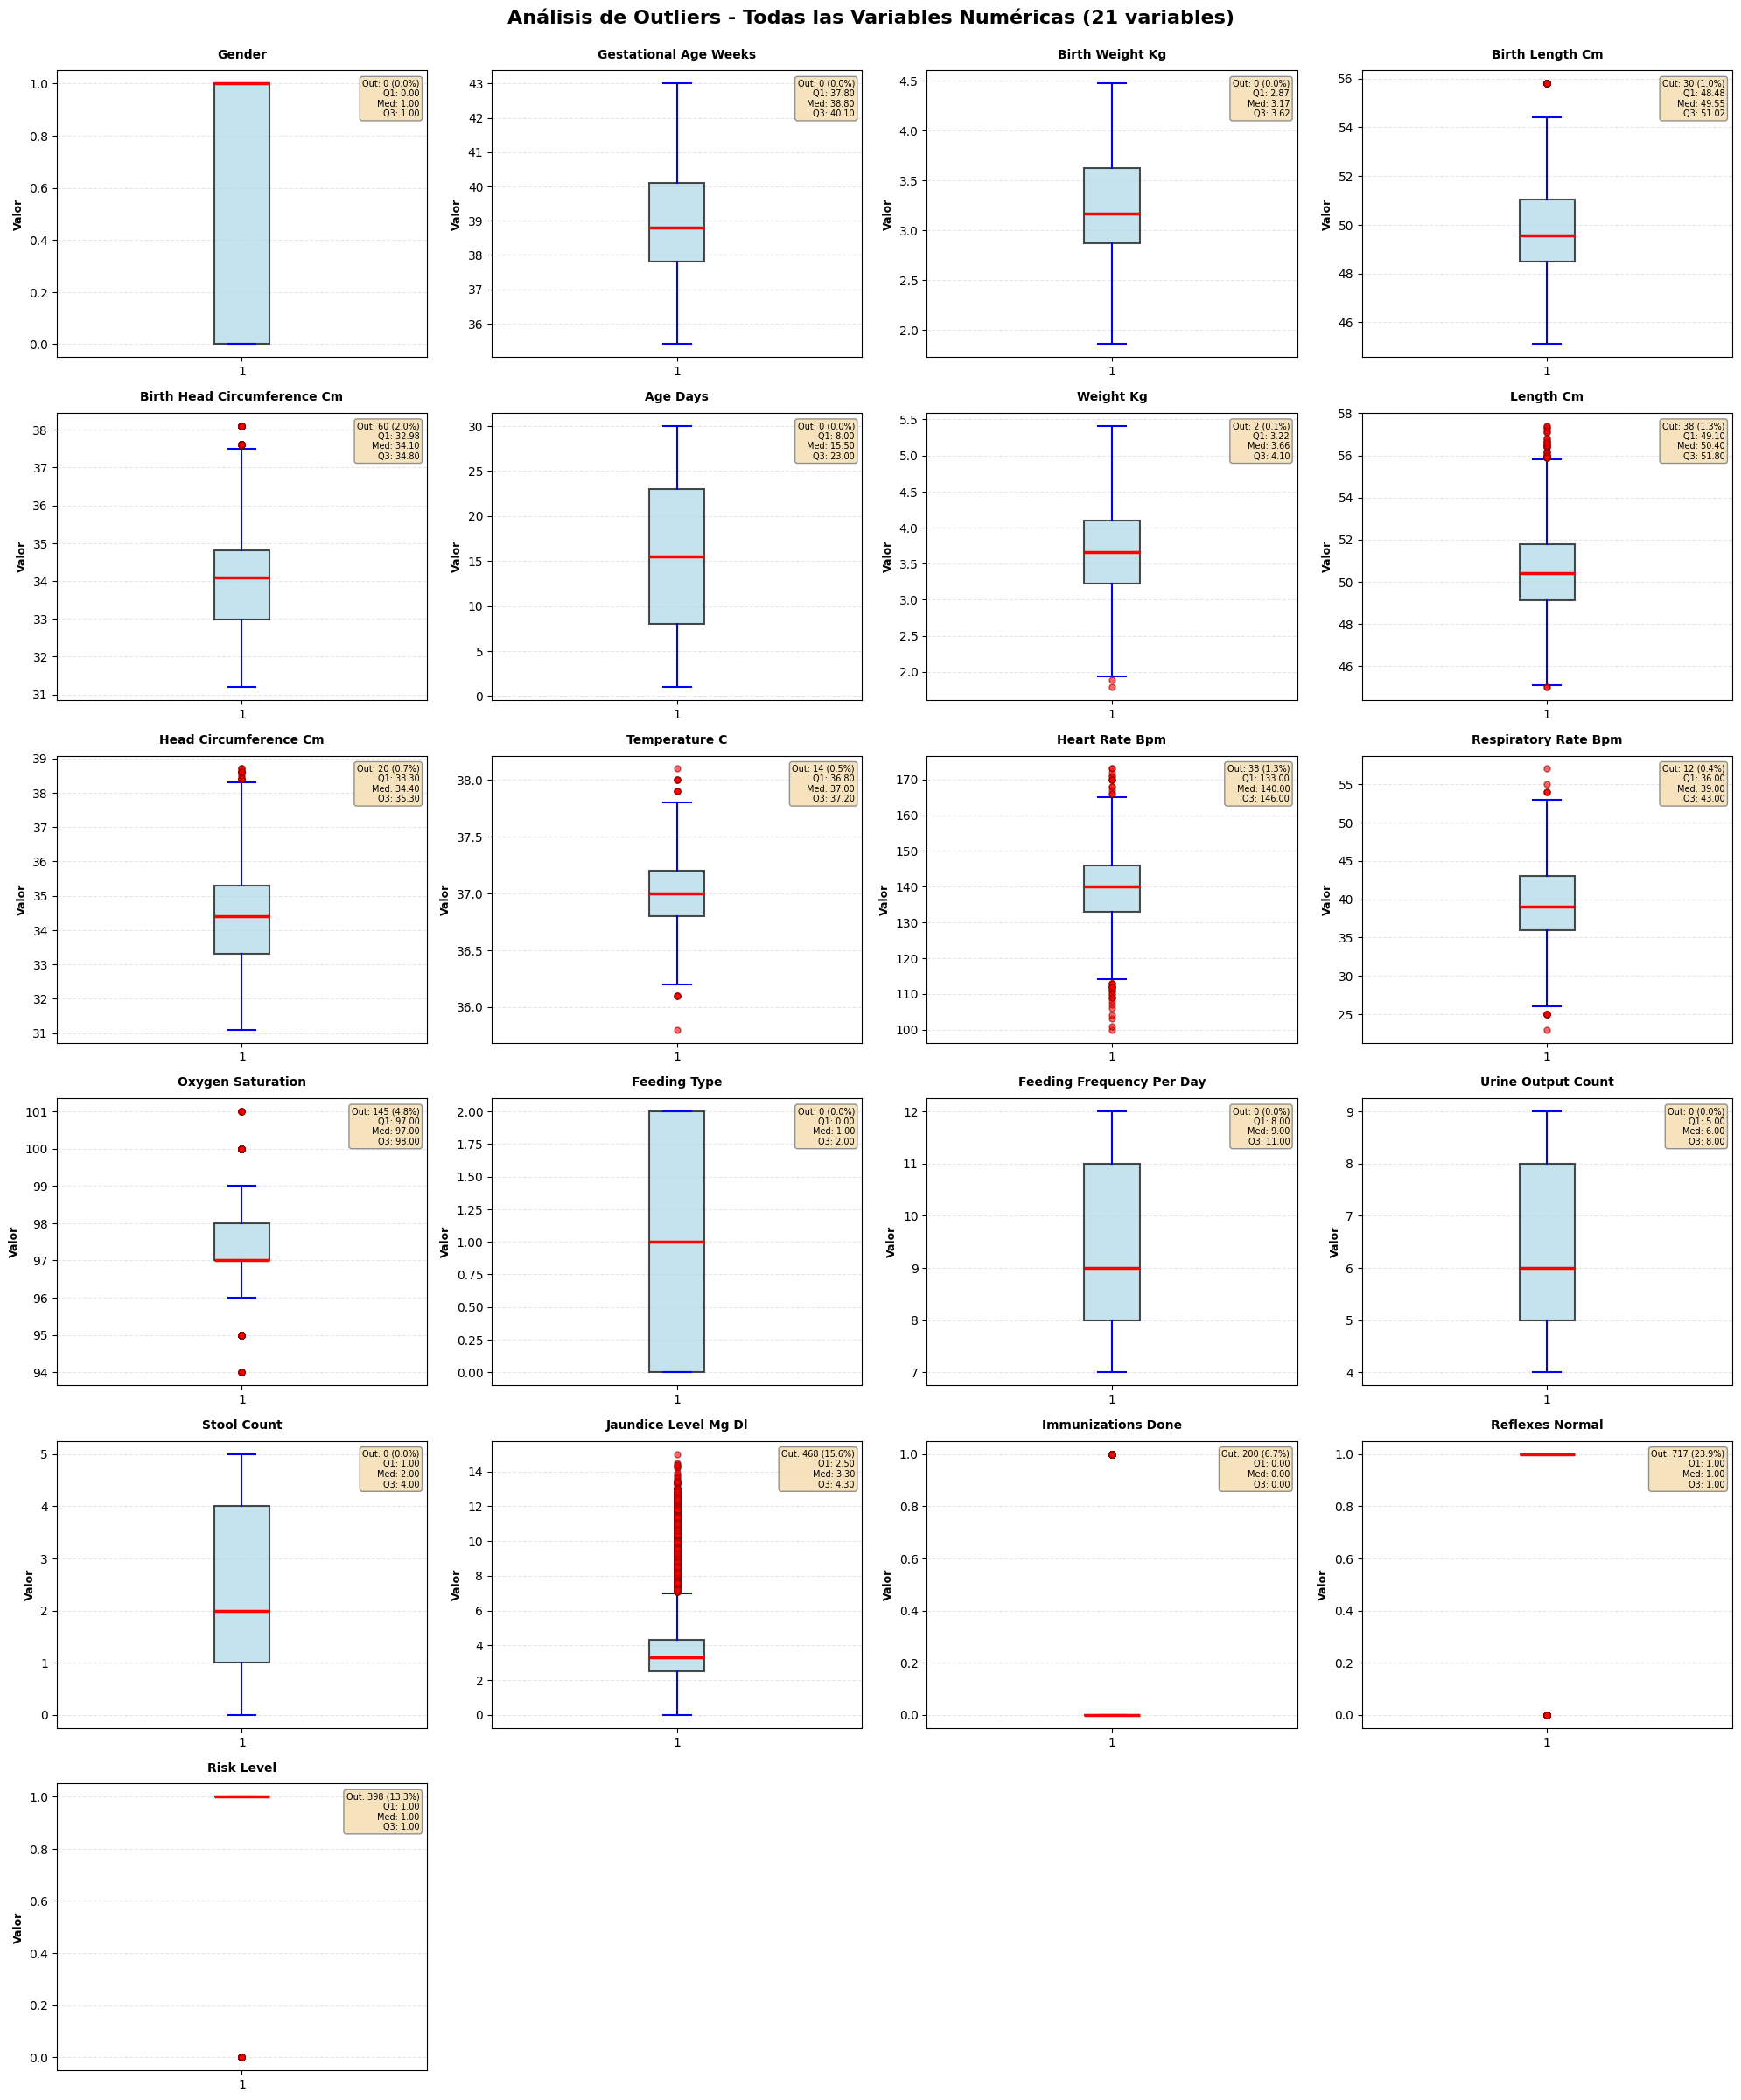

In [34]:
n_vars = len(numericas)
n_cols = 4
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4*n_rows))
axes = axes.ravel() if n_vars > 1 else [axes]

for i, col in enumerate(numericas):
    ax = axes[i]

    # Datos
    data_antes = df[col].dropna()

    # Crear boxplot
    bp = ax.boxplot(data_antes, vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7, linewidth=1.5),
                    medianprops=dict(color='red', linewidth=2.5),
                    whiskerprops=dict(color='blue', linewidth=1.5),
                    capprops=dict(color='blue', linewidth=1.5),
                    flierprops=dict(marker='o', markerfacecolor='red',
                                   markersize=5, alpha=0.6, markeredgecolor='darkred'))

    # Título y etiquetas
    ax.set_title(col.replace('_', ' ').title(), fontsize=10, fontweight='bold', pad=10)
    ax.set_ylabel('Valor', fontsize=9, fontweight='bold')
    ax.grid(axis='y', alpha=0.3, linestyle='--')

    # Calcular estadísticas
    q1 = data_antes.quantile(0.25)
    q3 = data_antes.quantile(0.75)
    iqr = q3 - q1
    median = data_antes.median()

    # Contar outliers
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_outliers = ((data_antes < lower) | (data_antes > upper)).sum()

    # Texto con estadísticas
    stats_text = f'Out: {n_outliers} ({n_outliers/len(data_antes)*100:.1f}%)\n'
    stats_text += f'Q1: {q1:.2f}\nMed: {median:.2f}\nQ3: {q3:.2f}'

    ax.text(0.98, 0.97, stats_text,
            transform=ax.transAxes,
            fontsize=7,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.85, edgecolor='gray'))

# Ocultar ejes vacíos
for i in range(n_vars, len(axes)):
    axes[i].axis('off')

plt.suptitle(f'Análisis de Outliers - Todas las Variables Numéricas ({n_vars} variables)',
             fontsize=16, fontweight='bold', y=0.998)
plt.tight_layout()
#plt.savefig('boxplots_todas_variables.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
df_filtered.loc[df['risk_level'] < 1, 'risk_level'] = 0

In [36]:
X = df_filtered.drop(columns=('risk_level'))
y = df_filtered['risk_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")


Accuracy: 92.50


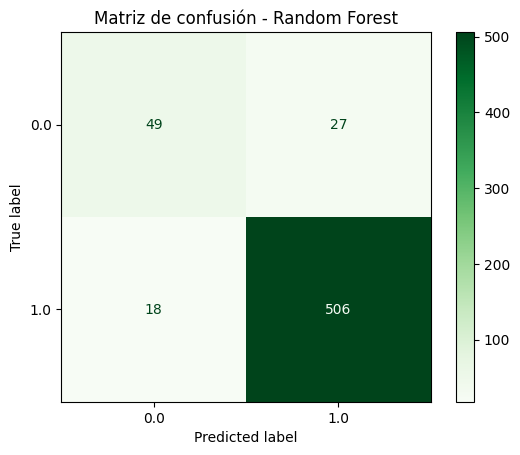

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Greens')
plt.title("Matriz de confusión - Random Forest")
plt.show()

/tmp/ipython-input-1964898970.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=importancias.head(10), palette='crest')


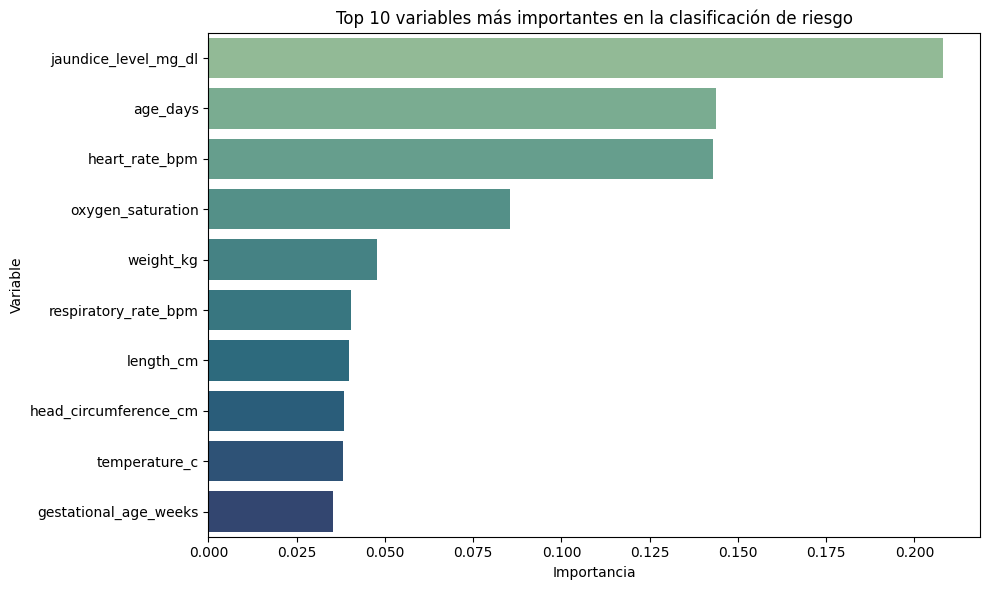

In [39]:
importancias = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importancia', y='Variable', data=importancias.head(10), palette='crest')
plt.title("Top 10 variables más importantes en la clasificación de riesgo")
plt.tight_layout()
plt.show()


In [41]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.64      0.69        76
         1.0       0.95      0.97      0.96       524

    accuracy                           0.93       600
   macro avg       0.84      0.81      0.82       600
weighted avg       0.92      0.93      0.92       600

